In [2]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv ('games_details.csv', index_col=0, delimiter=',', encoding='latin-1')
df


C:\Users\camil\AppData\Local\Temp\ipykernel_6076\296774311.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('games_details.csv', index_col=0, delimiter=',', encoding='latin-1')


,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
GAME_ID,,,,,,,,,,,,,,,,,,,,,
22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,1.0,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,2.0,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,9.0,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,9.0,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,0.0,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN


In [4]:
df2 = pd.read_csv ('games.csv', index_col=0, delimiter=',', encoding='latin-1')
df2 = df2.get(['SEASON','GAME_ID'])
df = df.merge(df2, how= 'right', on='GAME_ID')
df.head()
#df1 = df[['GAME_DATE_EST']]
#df1

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON
0,22100213,1.610613e+09,WAS,Washington,203484.0,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0,2021
1,22100213,1.610613e+09,WAS,Washington,1628398.0,Kyle Kuzma,Kyle,F,NaN,30:28,...,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0,2021
2,22100213,1.610613e+09,WAS,Washington,1629655.0,Daniel Gafford,Daniel,C,NaN,24:21,...,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0,2021
3,22100213,1.610613e+09,WAS,Washington,203078.0,Bradley Beal,Bradley,G,NaN,35:07,...,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0,2021
4,22100213,1.610613e+09,WAS,Washington,203915.0,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0,2021


In [5]:
dff = df.groupby(["START_POSITION","SEASON"]).agg(FG3M_=('FG3M','sum'),FG3A_=('FG3A','sum')).reset_index()
dff["FG3_%"] = dff["FG3M_"].div(dff["FG3A_"].values)
dff=dff.loc[dff['START_POSITION'] == 'C']
dff=dff.loc[dff['SEASON'] < 2020]
dff

,START_POSITION,SEASON,FG3M_,FG3A_,FG3_%
0,C,2003,139.0,432.0,0.321759
1,C,2004,110.0,367.0,0.299728
2,C,2005,113.0,354.0,0.319209
3,C,2006,245.0,730.0,0.335616
4,C,2007,472.0,1359.0,0.347314
5,C,2008,446.0,1168.0,0.381849
6,C,2009,388.0,1089.0,0.356290
7,C,2010,138.0,426.0,0.323944
8,C,2011,99.0,326.0,0.303681
9,C,2012,94.0,340.0,0.276471


Text(0.5, 0, 'SEASON')

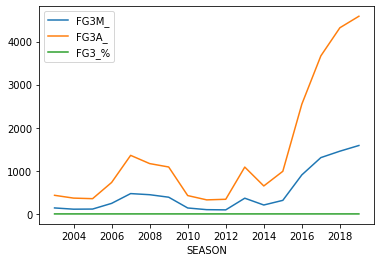

In [6]:
dff.plot(kind='line',x='SEASON')
plt.xlabel('SEASON')

In [7]:
dff2 = df.groupby(["START_POSITION","SEASON","TEAM_ID","TEAM_ABBREVIATION"]).agg(FG3M_=('FG3M','sum'),FG3A_=('FG3A','sum')).reset_index()
dff2 = dff2.loc[dff2['START_POSITION'] == 'C']
dff2["FG3_%"] = dff2["FG3M_"].div(dff2["FG3A_"].values)
dff2["TEAM_ID"] = dff2["TEAM_ID"].astype(int)
dff2

,START_POSITION,SEASON,TEAM_ID,TEAM_ABBREVIATION,FG3M_,FG3A_,FG3_%
0,C,2003,1610612737,ATL,1.0,3.0,0.333333
1,C,2003,1610612738,BOS,22.0,37.0,0.594595
2,C,2003,1610612739,CLE,2.0,7.0,0.285714
3,C,2003,1610612740,NOH,0.0,2.0,0.000000
4,C,2003,1610612741,CHI,2.0,6.0,0.333333
...,...,...,...,...,...,...,...
564,C,2021,1610612762,UTA,1.0,6.0,0.166667
565,C,2021,1610612763,MEM,0.0,3.0,0.000000
566,C,2021,1610612764,WAS,1.0,5.0,0.200000
567,C,2021,1610612765,DET,2.0,13.0,0.153846


In [8]:
df_rank = pd.read_csv ('ranking.csv', index_col=0, delimiter=',', encoding='latin-1')
df_rank['PRESEASON'] = df_rank['SEASON_ID'].astype(str).str[0]
df_rank['SEASON'] = df_rank['SEASON_ID'].astype(str).str[1:]
df_rank['SEASON'] = df_rank['SEASON'].astype(int)
df_rank = df_rank.loc[df_rank['PRESEASON'] == '2']
df_rank = df_rank.loc[df_rank['SEASON'] < 2020]
df_rank = df_rank.groupby(["TEAM_ID","SEASON"]).agg(FINAL_STANDINGS_DATE=('STANDINGSDATE','max'),FINAL_W=('W','max'),FINAL_L=('L','max')).reset_index()
df_rank["FINAL_W_PCT"] = df_rank["FINAL_W"]/(df_rank["FINAL_W"]+df_rank["FINAL_L"])
df_rank['TEAM_SEASON'] = df_rank["TEAM_ID"].astype(str)+df_rank["SEASON"].astype(str)
df_rank

,TEAM_ID,SEASON,FINAL_STANDINGS_DATE,FINAL_W,FINAL_L,FINAL_W_PCT,TEAM_SEASON
0,1610612737,2002,2003-10-04,35,47,0.426829,16106127372002
1,1610612737,2003,2004-10-11,28,54,0.341463,16106127372003
2,1610612737,2004,2005-10-09,13,69,0.158537,16106127372004
3,1610612737,2005,2006-10-04,26,56,0.317073,16106127372005
4,1610612737,2006,2007-10-05,30,52,0.365854,16106127372006
...,...,...,...,...,...,...,...
533,1610612766,2015,2016-09-30,48,34,0.585366,16106127662015
534,1610612766,2016,2017-09-29,36,46,0.439024,16106127662016
535,1610612766,2017,2018-09-27,36,46,0.439024,16106127662017
536,1610612766,2018,2019-09-29,39,43,0.475610,16106127662018


Concatenating TEAM_ID-SEASON to merge dataframes

In [9]:
dff2["TEAM_SEASON"] = dff2["TEAM_ID"].astype(str)+dff2["SEASON"].astype(str)


Merging the datasets (Team standings End of Season with Center 3 pointer metrics by season and team)

In [10]:
dff2 = dff2.get(['TEAM_SEASON','FG3M_','FG3A_','FG3_%'])
df_rank = df_rank.merge(dff2, on='TEAM_SEASON',  how= 'inner')
df_rank

,TEAM_ID,SEASON,FINAL_STANDINGS_DATE,FINAL_W,FINAL_L,FINAL_W_PCT,TEAM_SEASON,FG3M_,FG3A_,FG3_%
0,1610612737,2003,2004-10-11,28,54,0.341463,16106127372003,1.0,3.0,0.333333
1,1610612737,2004,2005-10-09,13,69,0.158537,16106127372004,12.0,25.0,0.480000
2,1610612737,2005,2006-10-04,26,56,0.317073,16106127372005,0.0,2.0,0.000000
3,1610612737,2006,2007-10-05,30,52,0.365854,16106127372006,0.0,1.0,0.000000
4,1610612737,2007,2008-10-04,37,45,0.451220,16106127372007,0.0,5.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
504,1610612766,2015,2016-09-30,48,34,0.585366,16106127662015,13.0,30.0,0.433333
505,1610612766,2016,2017-09-29,36,46,0.439024,16106127662016,27.0,69.0,0.391304
506,1610612766,2017,2018-09-27,36,46,0.439024,16106127662017,1.0,9.0,0.111111
507,1610612766,2018,2019-09-29,39,43,0.475610,16106127662018,10.0,28.0,0.357143


Getting the correlation matrix based by season

Text(0, 0.5, 'y label')

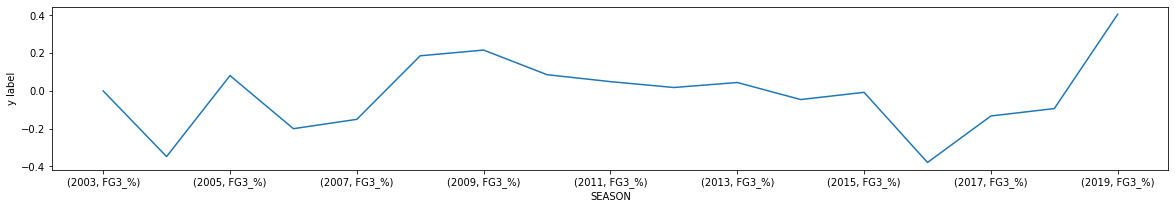

In [65]:
df_corr_3_PERC = df_rank.groupby('SEASON')[['FINAL_W_PCT','FG3_%']].corr()#.iloc[0::2,-1]
df_corr_3_PERC = df_corr_3_PERC.loc[df_corr_3_PERC['FINAL_W_PCT'] != 1]
df_corr_3_PERC = df_corr_3_PERC['FINAL_W_PCT']
df_corr_3_PERC
ax = df_corr_3_PERC.plot(figsize=(20,3))
ax.set_xlabel("SEASON")
ax.set_ylabel("y label")